### Importing libs 
* torch and tensorflow to work with array and tensors .
* torchvision is for training and build model
* to transform data to tensors .
* DataLoader is for deviding data to batches .
* matplotlib is for ploting result .



In [2]:
import torch
import torchvision
from torchvision import datasets
from torchvision import transforms ### to transform data
from torch.utils.data import DataLoader ### setting batch for data
import tensorflow as tf
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') 
"""enables you to specify the device type responsible to load a tensor into memory. The function expects a string argument specifying the device type."""
import matplotlib.pyplot as plt
import torch.nn.functional as F
import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Getting ready data
* transform to tensor
* deviding to batch


In [3]:
BATCH_SIZE = 100
NUM_EPOCHS = 100


### we download data make it to tensor 
trainset = datasets.MNIST(root='data' , train=True , transform=transforms.ToTensor() , download=True)
testset = datasets.MNIST(root='data' , train=False , transform=transforms.ToTensor() , download=True)

### setting batch for data , using shuffles
train_loader = DataLoader(dataset=trainset , batch_size=BATCH_SIZE , shuffle=True)
test_loader = DataLoader(dataset=testset , shuffle= True , batch_size=BATCH_SIZE )


100.0%


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



100.0%


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



100.0%


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



100.0%


Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



### Plotting data

100


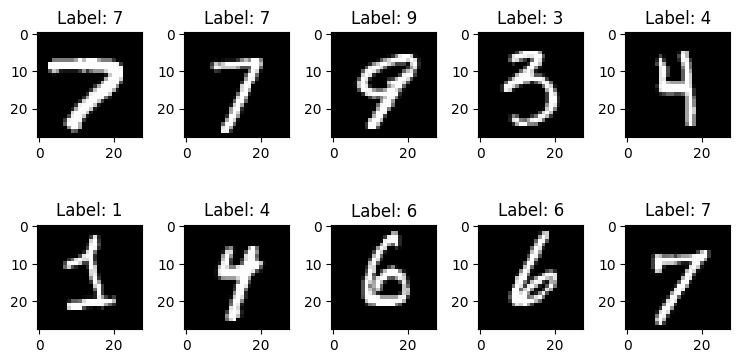

In [4]:
print(len(test_loader))
print(test_loader)
num =10
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
i=0
for index , (images , labels) in enumerate(train_loader):
    
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i].view(28,28), cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
    i+=1
    if i==10:
        break
plt.tight_layout()
plt.show()


### MLP Implementation

In [5]:
class MLP(torch.nn.Module):
    
    def __init__(self,num_features , num_hidden , num_classes):
        super().__init__()  ### why we use it ?
        
        ### 1st layer
        self.linear_1 = torch.nn.Linear(num_features , num_hidden)
        self.linear_1.weight.detach().normal_(0.0 , 0.1)
        self.linear_1.bias.detach().zero_()
        
        
        """we have only one hidden layer ."""
        
        ### Output layer
        self.linear_out = torch.nn.Linear(num_hidden , num_classes)
        self.linear_out.weight.detach().normal_(0.0 , 0.1)
        self.linear_out.bias.detach().zero_()
        
    def forward(self , x):
        out = self.linear_1(x)
        out = torch.sigmoid(out)
        logits = self.linear_out(out)
        return logits

### Creating model 


In [ ]:
model = MLP(num_features=28*28,
            num_hidden=100,
            num_classes=10)

model = model.to(DEVICE)